In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import matplotlib
from mpl_toolkits.basemap import Basemap


% matplotlib inline

In [3]:
#Importing data 

eagleford_df = pd.read_csv("clean_data.csv")
oil = eagleford_df[(eagleford_df['Well Type'] != 'Gas')]

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


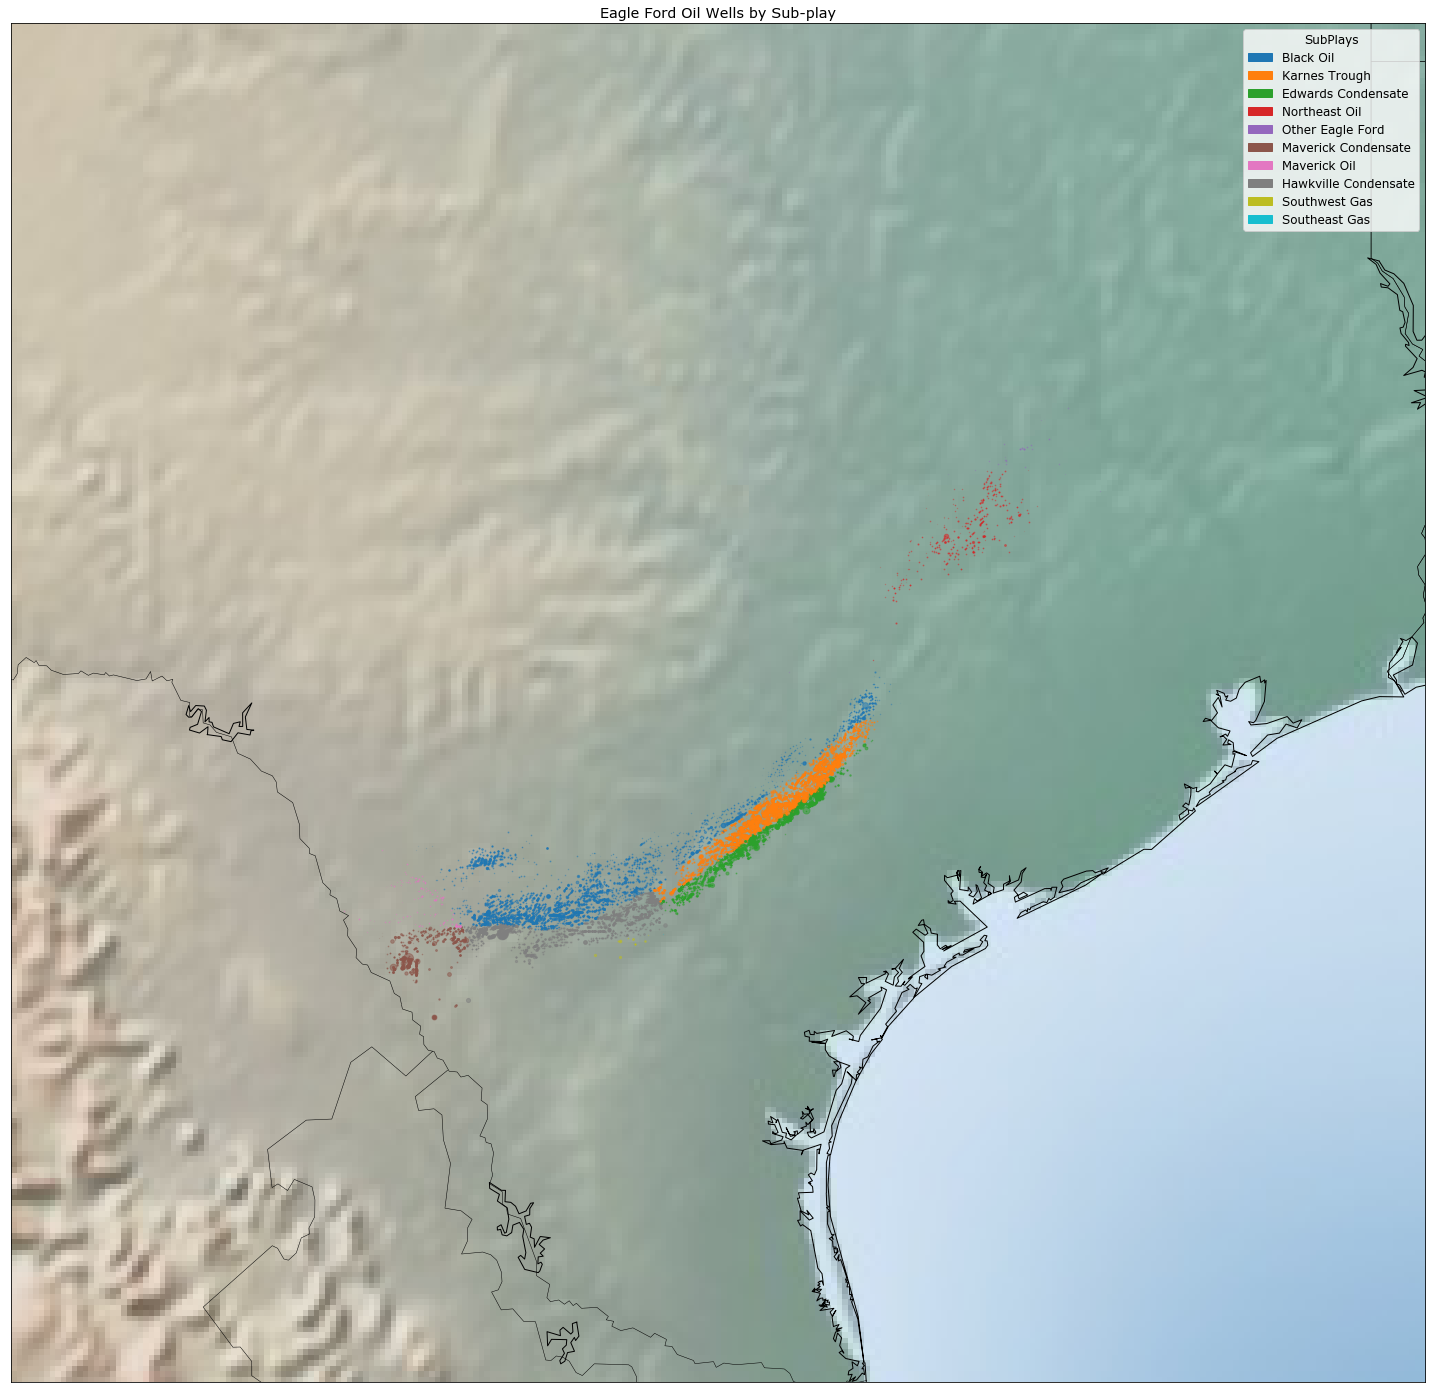

In [52]:
# CREATING A MAP TO VISUALIZE OIL WELLS BY SUB-PLAY
import matplotlib.patches as mpatches
#lat/Longs for extent
lats = list(oil['Latitude'])
lons = list(oil['Longitude'])
subplays = oil['Sub-play'].unique()
#Setting the parameters for the map
font = {'family' : 'verdana',
        'size'   : 12}
matplotlib.rc('font', **font)
   
# How much to zoom from coordinates (in degrees)
zoom_scale = 2

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(30,25))
plt.title("Eagle Ford Oil Wells by Sub-play")

# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.etopo()
m.shadedrelief()

min_marker_size = 3

#Size the markers according to the boe 
boeSz = list(oil['EUR Total (mmboe)'])

#Get the lats and lons for oil wells to plot 
olats = list(oil['Latitude'])
olons = list(oil['Longitude'])
oSubPlay = list(oil['Sub-play'])
idx = 0
seen_first = {}
color_set = []

for sp in oSubPlay:
    if sp not in seen_first:
        seen_first[sp] = "C"+str(idx)
        idx = idx + 1
for i in range(len(oSubPlay)):
    oSubPlayInt[i] = seen_first[oSubPlay[i]]
#     color_set.append(oSubPlayInt[i])
    

# subplay_color_dict = dict(zip(subplays, color_set)) # Creates a dictionary so each sub-play has a colour code
#Color each well according to a sub-play it belongs to

for i in range(len(oSubPlay)):
    x,y = m(float(olons[i]), float(olats[i]))
    msize = boeSz[i]*min_marker_size
    m.plot(x, y, marker = 'o', c=str(oSubPlayInt[i]), markersize=msize, alpha=0.5, latlon=False)
    

#cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
legend_list = []
handles_list = []
for k in seen_first.keys():
    legend_list.append(k)
    
for i in range(len(legend_list)):
    handles_list.append(mpatches.Patch(color=seen_first[legend_list[i]], label=legend_list[i]))

plt.legend(handles=handles_list, title='SubPlays')



# save the figure and show it
plt.savefig('EagleFordSubPlays.png', format='png', dpi=96, transparent=True)
plt.show()
